# Acquisition Function Optimization

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from bayes_opt import BayesianOptimization

# use sklearn's default parameters for theta and random_start
gp_params = {"corr": "cubic", "theta0": 0.1, "thetaL": None, "thetaU": None, "random_start": 1}

## Target function

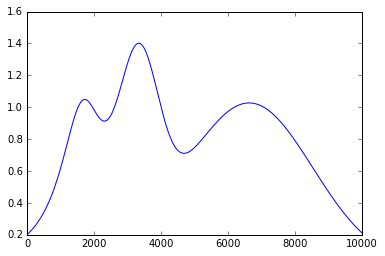

In [2]:
np.random.seed(42)
xs = np.linspace(-2, 10, 10000)
f = np.exp(-(xs - 2)**2) + np.exp(-(xs - 6)**2/10) + 1/ (xs**2 + 1)

plt.plot(f)
plt.show()

## Utility function for plotting

In [3]:
def plot_bo(f, bo):
    xs = [x["x"] for x in bo.res["all"]["params"]]
    ys = bo.res["all"]["values"]

    mean, var = bo.gp.predict(np.arange(len(f)).reshape(-1, 1), eval_MSE=True)
    
    plt.plot(f)
    plt.plot(np.arange(len(f)), mean)
    plt.fill_between(np.arange(len(f)), mean+var, mean-var, alpha=0.1)
    plt.scatter(bo.X.flatten(), bo.Y, c="red", s=50, zorder=10)
    plt.xlim(0, len(f))
    plt.ylim(f.min()-0.1*(f.max()-f.min()), f.max()+0.1*(f.max()-f.min()))
    plt.show()

# Optimization of the acquisition function using scipy.minimize

Wall time: 18.2 s


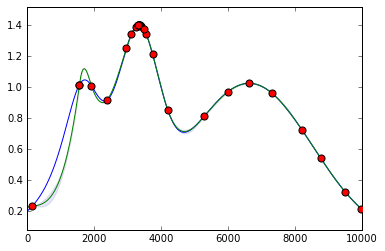

In [4]:
np.random.seed(42)

bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

%time bo.maximize(init_points=5, n_iter=25, test_random_points=False, acq="ei", **gp_params)

plot_bo(f, bo)

# Optimization of the acquisition function by testing random points

**This should be much faster...**

Wall time: 96.5 ms


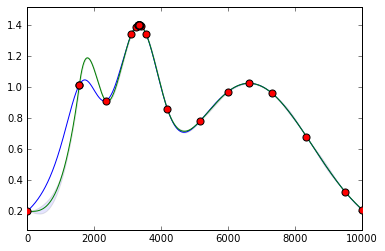

In [5]:
np.random.seed(42)

bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

%time bo.maximize(init_points=5, n_iter=25, test_random_points=1000, acq="ei", **gp_params)

plot_bo(f, bo)